In [1]:
import pandas as pd
import numpy as np  

In [2]:
data = pd.read_csv("C:/Users/okezi/Desktop/Sujoy's Assignment/Housing.csv")
data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   ZN       509 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     509 non-null    int64  
 4   NOX      507 non-null    float64
 5   RM       509 non-null    float64
 6   AGE      508 non-null    float64
 7   DIS      509 non-null    float64
 8   RAD      508 non-null    float64
 9   TAX      509 non-null    int64  
 10  PTRATIO  509 non-null    float64
 11  B        509 non-null    float64
 12  LSTAT    508 non-null    float64
 13  MEDV     509 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.8 KB


(None,
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
 count  509.000000  509.000000  506.000000  509.000000  507.000000  509.000000   
 mean     3.707516   11.296660   11.198281    0.068762    0.555216    6.279845   
 std      8.732089   23.269781    6.856713    0.253298    0.115633    0.703449   
 min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
 25%      0.082210    0.000000    5.190000    0.000000    0.449000    5.880000   
 50%      0.261690    0.000000    9.690000    0.000000    0.538000    6.202000   
 75%      3.693110   12.500000   18.100000    0.000000    0.624000    6.619000   
 max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   
 
               AGE         DIS         RAD         TAX     PTRATIO           B  \
 count  508.000000  509.000000  508.000000  509.000000  509.000000  509.000000   
 mean    68.579134    3.787705    9.610236  409.216110   18.463851  356.664892   
 std   

### Data Pre-processing:

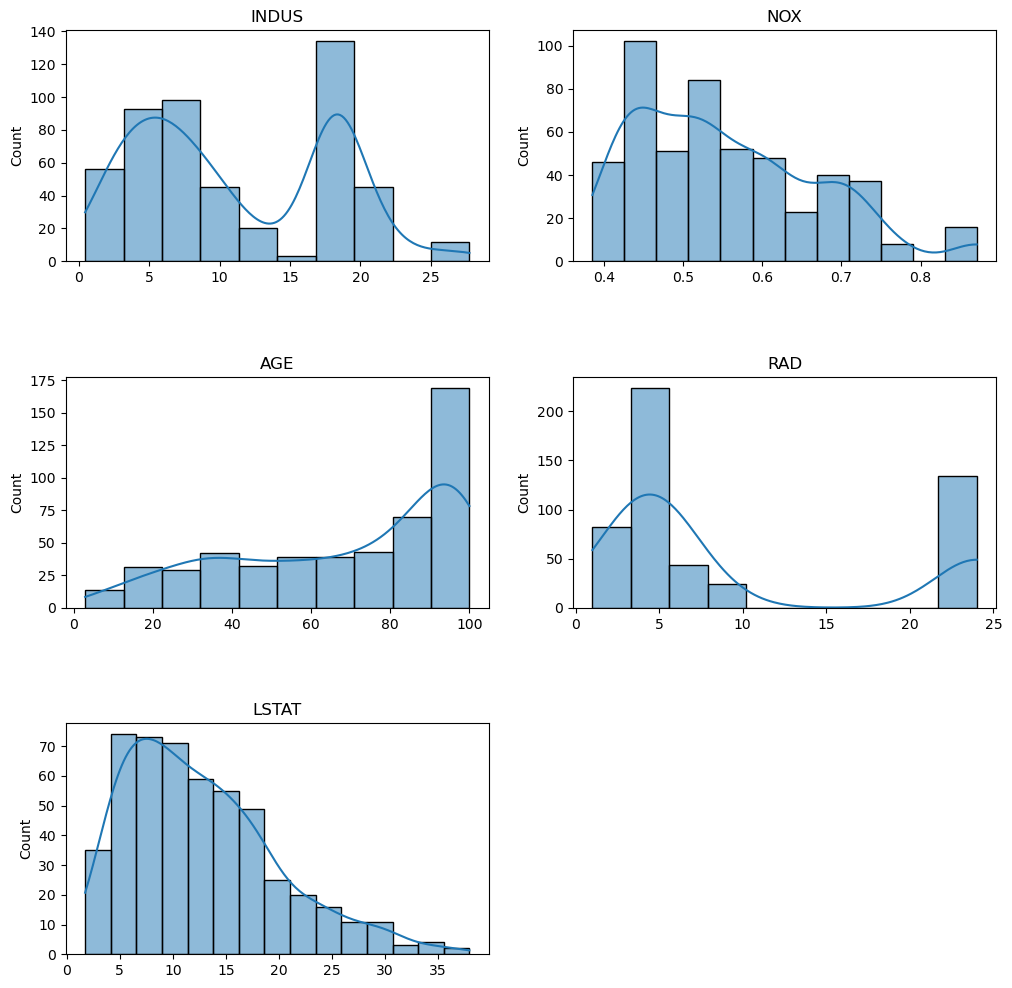

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for columns with missing data to assess their distribution, and then decide the best data cleaning method to use.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5)

# List of columns with missing data
missing_columns = ['INDUS', 'NOX', 'AGE', 'RAD', 'LSTAT']

for ax, column in zip(axes.flatten(), missing_columns):
    sns.histplot(data[column], kde=True, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')

# We added one extra subplot so we need to remove it
fig.delaxes(axes[2,1])

plt.show()

Based on the vizualizations of the variables with missing data in our dataset, we will be using the following methods to clean our data:
1. INDUS, NOX, AGE, LSTAT: Given the skew in these variables, imputing missing values with the median might be more appropriate than the mean, as the median is less affected by outliers and skewed data.
2. RAD: Due to its discrete and multimodal nature, it might be better to impute missing values using the mode (most frequent value).

In [4]:
# Calculating medians for numerical columns
median_indus = data['INDUS'].median()
median_nox = data['NOX'].median()
median_age = data['AGE'].median()
median_lstat = data['LSTAT'].median()

# Calculating mode for the 'RAD' column
mode_rad = data['RAD'].mode()[0]

# Imputing missing values
data['INDUS'].fillna(median_indus, inplace=True)
data['NOX'].fillna(median_nox, inplace=True)
data['AGE'].fillna(median_age, inplace=True)
data['RAD'].fillna(mode_rad, inplace=True)
data['LSTAT'].fillna(median_lstat, inplace=True)

In [5]:
# Checking to ensure no more missing values
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### Model Development:
We'll train at least two models for the regression task. Based on the description of our data and purpose, good candidates are:
#### Linear Regression:
As a baseline model because it's simple and interpretable.
#### Random Forest Regression:
For its ability to handle non-linear relationships and feature importance estimation.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [7]:
# Features and target
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [9]:
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

### Model Evaluation:

In [10]:
# Make predictions
lr_predictions = linear_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)

In [11]:
# Evaluating Linear Regression model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_predictions)

In [12]:
# Evaluating Random Regression model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

In [13]:
print('Linear Regression Metrics:')
print('MAE:', lr_mae)
print('MSE:', lr_mse)
print('RMSE:', lr_rmse)
print('R²:', lr_r2)

Linear Regression Metrics:
MAE: 2.989424219798945
MSE: 20.468178868808096
RMSE: 4.524177148256697
R²: 0.7380611379586896


In [14]:
print('Random Forest Metrics:')
print('MAE:', rf_mae)
print('MSE:', rf_mse)
print('RMSE:', rf_rmse)
print('R²:', rf_r2)

Random Forest Metrics:
MAE: 1.9889705882352942
MSE: 8.428769068627451
RMSE: 2.903234242810499
R²: 0.8921339220066218


The Random Forest model outperforms Linear Regression across all metrics, indicating better accuracy and fit. It achieves lower errors (MAE, MSE, RMSE) and a higher R², explaining 89.2% of variance in housing prices, compared to 73.8% by Linear Regression. This suggests Random Forest is more effective for this prediction task.

